### Problem Statement
Propensity modeling is a method that aims to forecast the chance that individuals, leads, and customers will engage in specific actions. This method uses statistical analysis which takes into account all the independent and confounding factors that impact customer behavior.
Suppose you are working for a company as a Data Scientist. Your company is commissioned by an insurance company to develop a tool to optimize their marketing efforts.
This project is aimed at building a propensity model to identify potential customers.

### Data Dictionary

1. custAge - The age of the customer.
2. prefession - Type of job.
3. marital - Marital status.
4. schooling - Education level.
5. default - Has a previous defaulted account.
6. housing - Has a housing loan.
7. loan - Has a personl loan.
8. contact - Preferred contact type.
9. month - Last contact month
10. day_of_week - Last contact day of the week.
11. campaign - Number of times the customer was contacted.
12. pdays - Number of days that passed after the client was last contacted.
13. previous - Number of contacts performed before this campaign and for this client.
14. poutcome - Outcome of the previous marketing campaign.
15. emp.var.rate - Employment variation rate - quarterly indicater.
16. cons.price.id - Consumer price index - monthly indicator.
17. cons.conf.idx - Consumer confidence index - monthly indicator.
18. euribor3m - Euribor 3 month rate - daily indicator.
19. nr.employed - Number of employees - quarterly indicator.
20. pmonths - Number of months that passed by after the client was last contacted from a previous campaign.
21. pastEmail - Number of previous emails sent to this client.
22. responded (target variable) - Did the customer respond to the campaign and purchase a policy.

## Table of Contents

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
   - 2.1 - **[Understanding the Data](#understand)**
   - 2.2 - **[Exploratory Data Analysis](#EDA)**
   - 2.3 - **[Data Cleaning](#clean)**
   - 2.4 - **[Encoding](#encoding)**
   - 2.5 - **[Balancing the data](#balancing)**
   - 2.6 - **[Feature Scaling](#scaling)**
3. **[Model Selection, Training & Validation](#model)**
   - 3.1 - **[Naive Bayes Model](#nbm)**
   - 3.2 - **[Random Forest Model](#rfm)**
   - 3.3 - **[Support Vector Machine Classifier Model](#svm)**
4. **[Hyper Parameter Tuning](#tuning)**
   - 4.1 - **[SVM Model Hyper Parameter Tuning](#svm_tune)**
   - 4.2 - **[Random Forest Model Hyper Parameter Tuning](#rfm_tune)**
5. **[Model Deployment](#deploy)**
   - 5.1 - **[Reading and undestanding the test data](#read_test)**
   - 5.2 - **[Preprocessing the test data](#preprocess_test)**
   - 5.3 - **[Predicting and saving the test data result](#predict_test)**
   - 5.4 - **[Saving the trained Machine Learning models](#save)**
6. **[Conclusion](#conclusion)**

<a id="lib"></a>
### 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

<a id="prep"></a>
### 2. Data Preparation

In [3]:
propensity_df = pd.read_excel("data/train.xlsx")
propensity_df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,...,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0


<a id="understand"></a>
### 2.1 Understanding the Data

In [4]:
propensity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  previous        8238 non-null   float64
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

In [5]:
propensity_df.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id
count,6224.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,930.000000,8238.000000
mean,39.953728,2.531682,960.916606,0.183054,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501,77.709677,4119.500000
std,10.540516,2.709773,190.695054,0.514209,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101,2881.768500,2378.250092
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,-87622.112070,1.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000,124.000000,2060.250000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000,170.000000,4119.500000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,213.000000,6178.750000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000,515.000000,8238.000000


In [6]:
propensity_df.describe(include=object)

,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,poutcome,responded
count,8238,8238,5832,8238,8238,8238,8238,8238,7451,8238,8238
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,mon,nonexistent,no
freq,2102,4957,1731,6619,4300,6775,5243,2814,1598,7060,7310


In [7]:
propensity_df['responded'].value_counts()

responded
no     7310
yes     928
Name: count, dtype: int64

In [8]:
propensity_df.corr(numeric_only=True)

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id
custAge,1.000000,-0.003293,-0.046927,0.047157,-0.003919,0.014048,0.139191,0.002702,-0.036146,-0.046907,0.033321,0.148883,0.009704
campaign,-0.003293,1.000000,0.043170,-0.067156,0.144846,0.131177,-0.022511,0.126954,0.137529,0.043156,-0.050854,-0.075853,-0.040301
pdays,-0.046927,0.043170,1.000000,-0.591426,0.272676,0.071599,-0.088312,0.300028,0.381316,0.999992,-0.503876,-0.102455,-0.189173
previous,0.047157,-0.067156,-0.591426,1.000000,-0.412068,-0.180294,-0.076815,-0.450641,-0.504011,-0.591439,0.799061,0.094548,0.127639
emp.var.rate,-0.003919,0.144846,0.272676,-0.412068,1.000000,0.766178,0.234569,0.971495,0.901478,0.272602,-0.332596,-0.186664,-0.169001
cons.price.idx,0.014048,0.131177,0.071599,-0.180294,0.766178,1.000000,0.087312,0.675538,0.498278,0.071356,-0.157092,-0.097575,-0.068667
cons.conf.idx,0.139191,-0.022511,-0.088312,-0.076815,0.234569,0.087312,1.000000,0.312890,0.134930,-0.088209,-0.054076,0.050431,0.011338
euribor3m,0.002702,0.126954,0.300028,-0.450641,0.971495,0.675538,0.312890,1.000000,0.942894,0.300052,-0.357731,-0.191713,-0.174173
nr.employed,-0.036146,0.137529,0.381316,-0.504011,0.901478,0.498278,0.134930,0.942894,1.000000,0.381430,-0.394005,-0.189686,-0.199313
pmonths,-0.046907,0.043156,0.999992,-0.591439,0.272602,0.071356,-0.088209,0.300052,0.381430,1.000000,-0.503813,-0.102407,-0.189188


In [9]:
num_cols = propensity_df.select_dtypes(exclude=object).columns
obj_cols = propensity_df.select_dtypes(include=object).columns
print('Numerical datatype columns:', num_cols)
print('Categorical datatype columns:', obj_cols)

Numerical datatype columns: Index(['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'pmonths', 'pastEmail', 'profit', 'id'],
      dtype='object')
Categorical datatype columns: Index(['profession', 'marital', 'schooling', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'responded'],
      dtype='object')


<a id="EDA"></a>
### 2.2 Exploratory Data Analysis

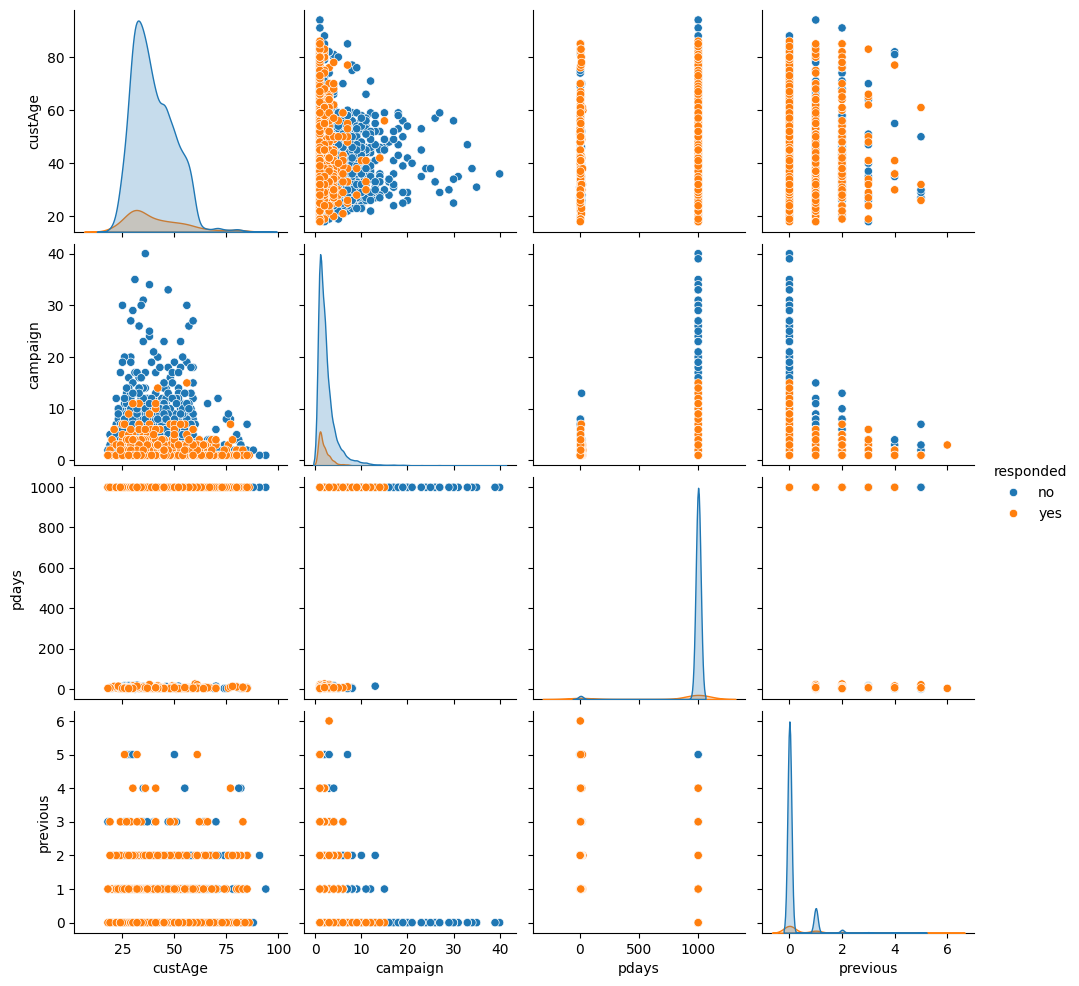

In [10]:
sns.pairplot(propensity_df[['custAge', 'campaign', 'pdays', 'previous', 'responded']], hue='responded')

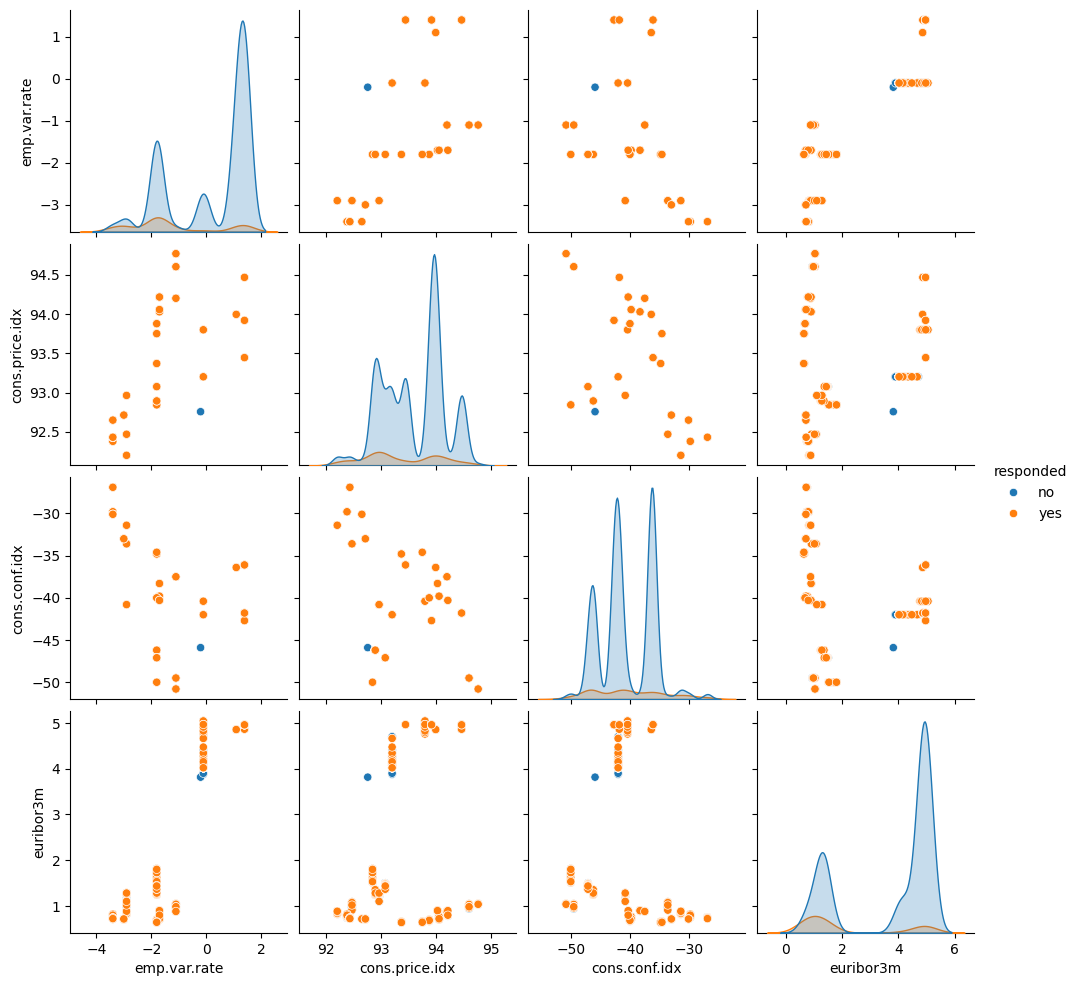

In [11]:
sns.pairplot(propensity_df[['emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'responded']], hue='responded')

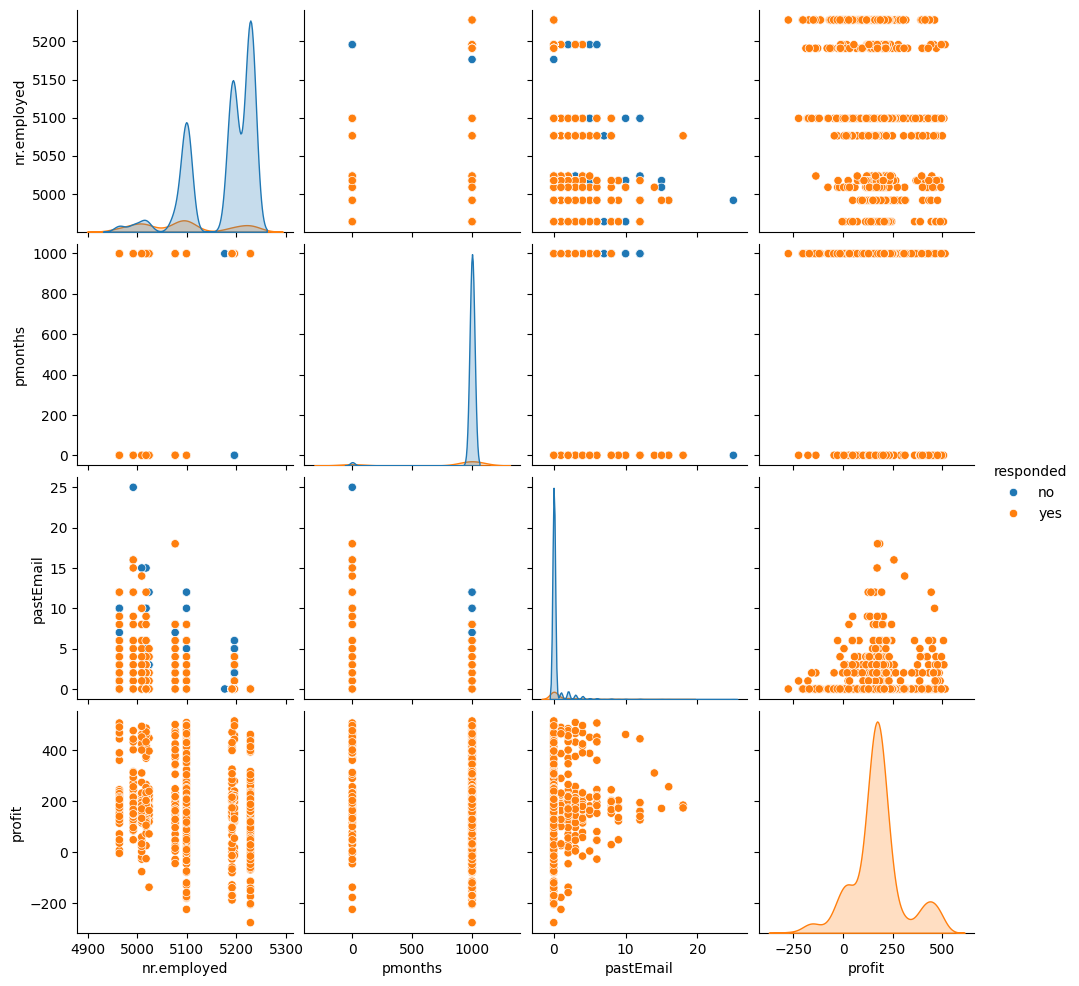

In [12]:
sns.pairplot(propensity_df[['nr.employed','pmonths', 'pastEmail', 'profit', 'responded']], hue='responded')

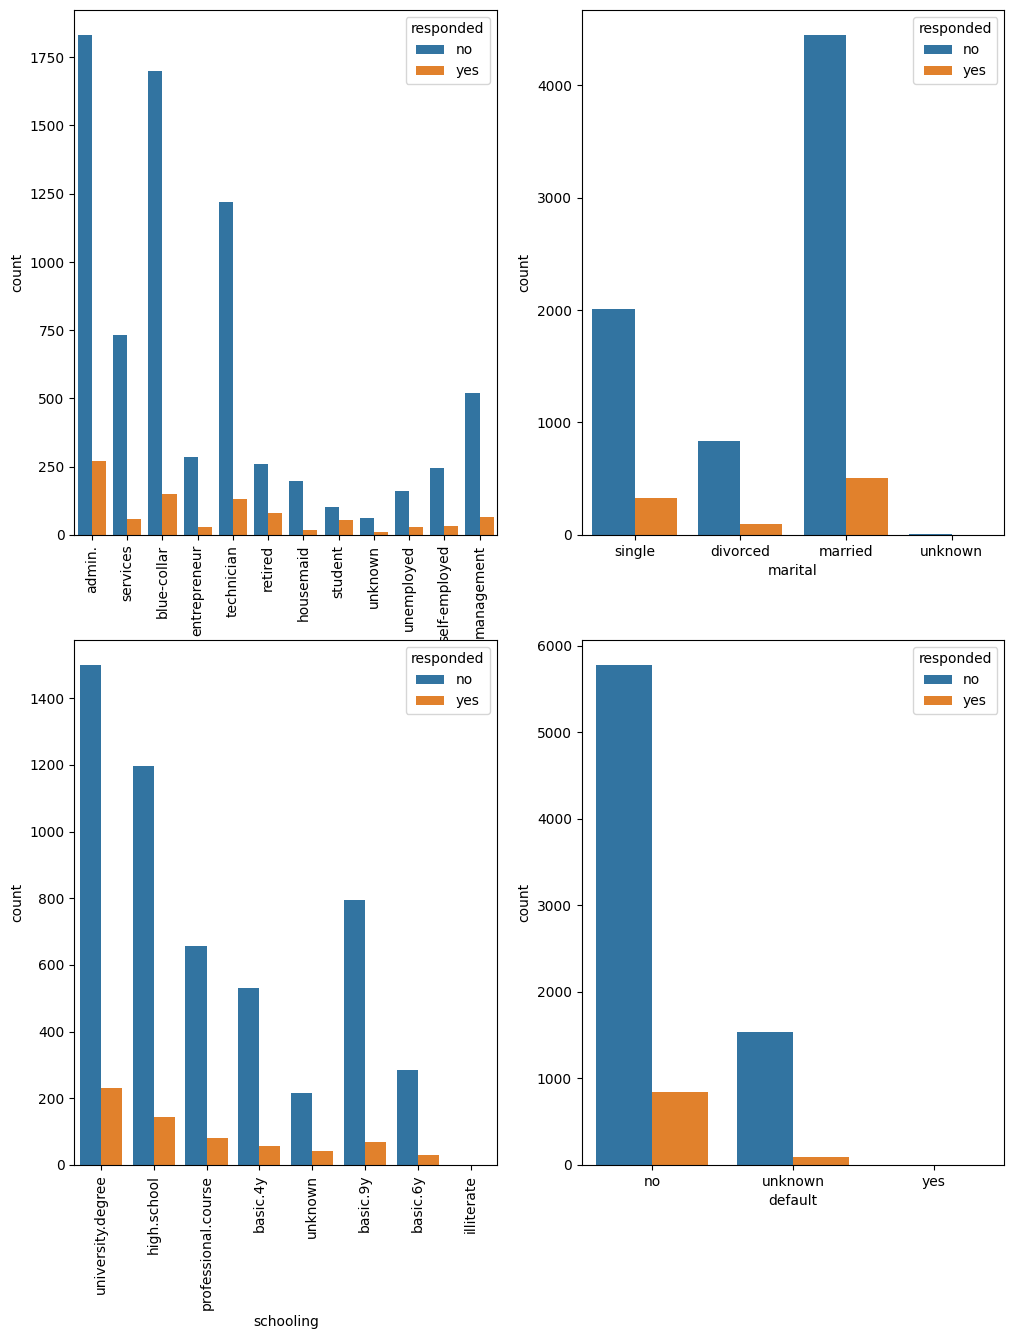

In [13]:
fig, ax = plt.subplots(2,2, figsize=(12,15))
sns.countplot(data=propensity_df, x='profession', hue='responded', ax=ax[0,0])
ax[0,0].tick_params(axis='x',rotation=90)
sns.countplot(data=propensity_df, x='marital', hue='responded', ax=ax[0,1])
sns.countplot(data=propensity_df, x='schooling', hue='responded', ax=ax[1,0])
ax[1,0].tick_params(axis='x',rotation=90)
sns.countplot(data=propensity_df, x='default', hue='responded', ax=ax[1,1])
plt.show()

1. Profession - Admin & blue-collar professions are mostly not responding.
2. Marital - Married people are mostly not responding.
3. Schooling - University-degree and high-school people are mostly not responding.
4. Default - The people not having account are mostly not responding.

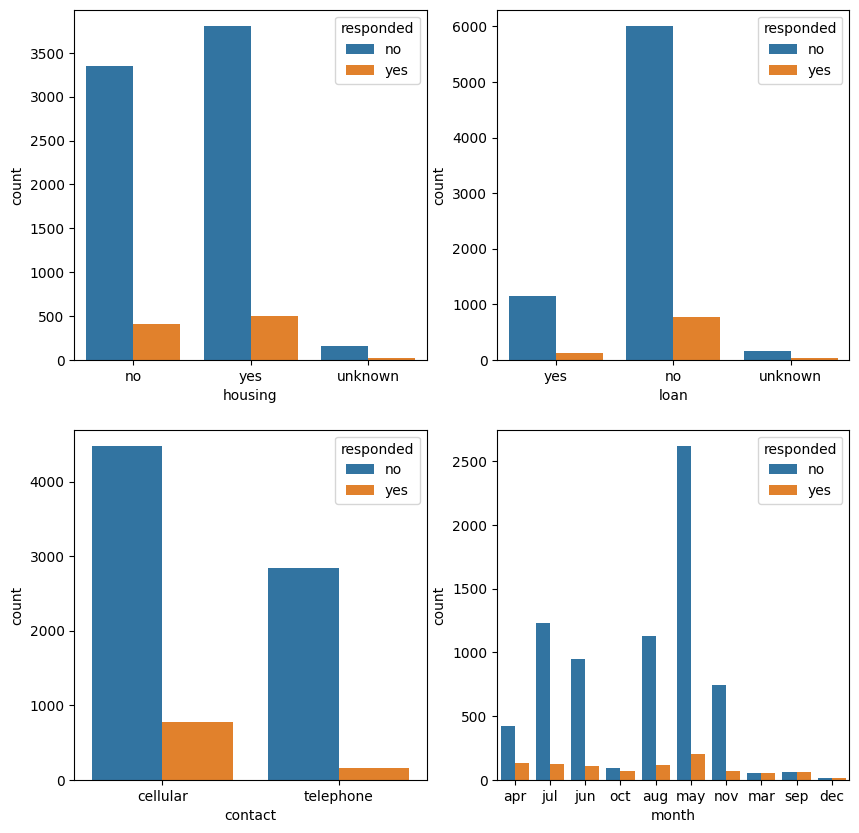

In [14]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.countplot(data=propensity_df, x='housing', hue='responded', ax=ax[0,0])
sns.countplot(data=propensity_df, x='loan', hue='responded', ax=ax[0,1])
sns.countplot(data=propensity_df, x='contact', hue='responded', ax=ax[1,0])
sns.countplot(data=propensity_df, x='month', hue='responded', ax=ax[1,1])
plt.show()

1. Housing loan - The people who having housing loan not responding.
2. Personal loan - The people who not taking personal loan not responding.
3. Month - Mostly people responding on May month.
4. Contact - The people who having cellular phone not responding.

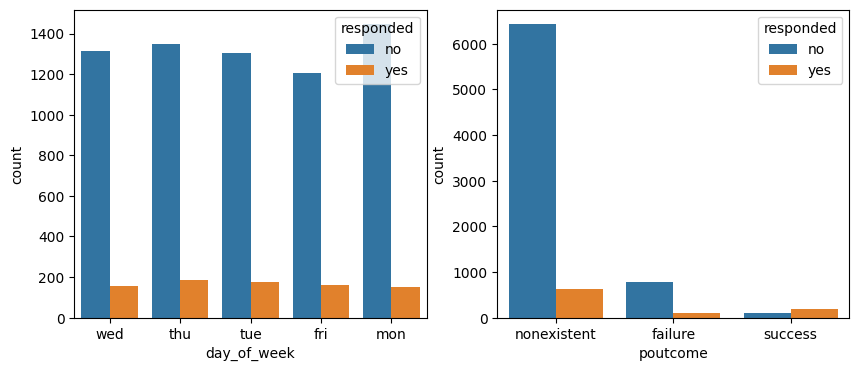

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.countplot(data=propensity_df, x='day_of_week', hue='responded', ax=ax[0])
sns.countplot(data=propensity_df, x='poutcome', hue='responded', ax=ax[1])
plt.show()

1. Day_of_week - Mostly people not responding comparatively than other days.
2. Poutcome - Mostly not existant people not responding.

<Axes: ylabel='custAge'>

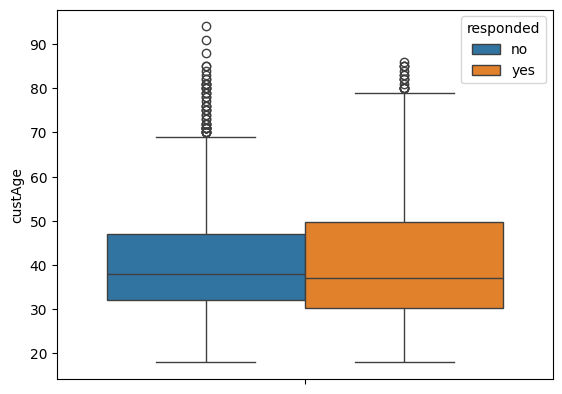

In [16]:
sns.boxplot(propensity_df, y='custAge', hue='responded')

* Comparatively people having low and high age are responding.

In [17]:
propensity_df['responded'] = propensity_df['responded'].map({'yes':1, 'no':0})
propensity_df['responded'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: responded, dtype: float64

<Axes: >

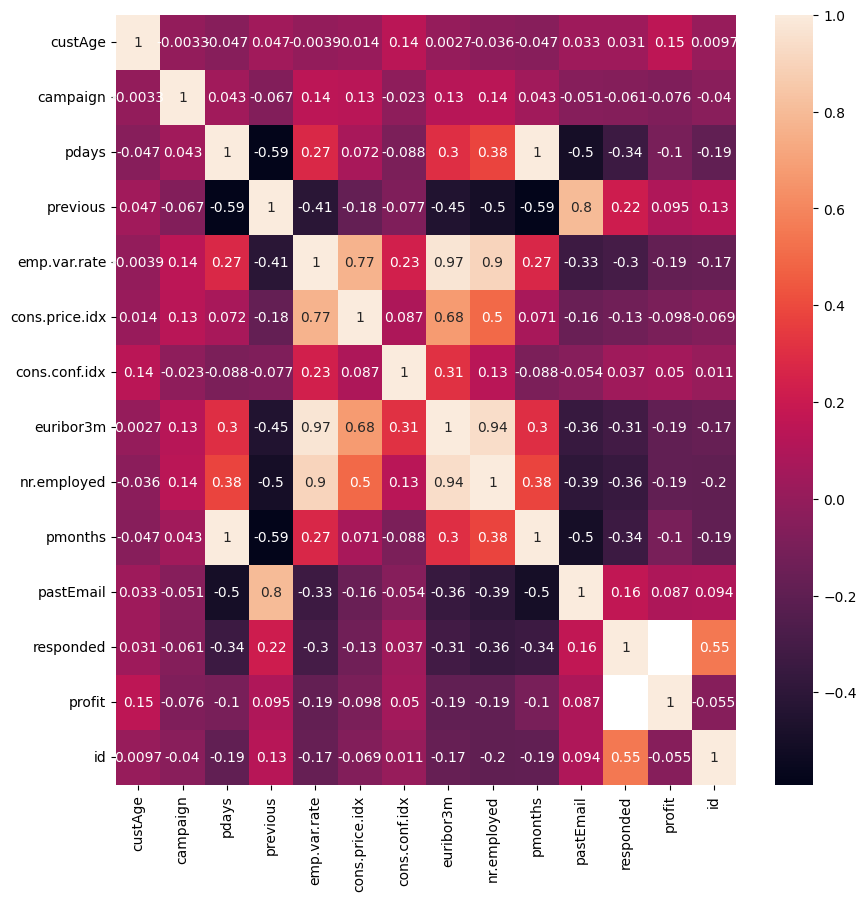

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(propensity_df.corr(numeric_only=True), annot=True)

* Responded values are highly correlated with the pdays, emp.var.rate, euribor3m, nr.employed and pmonths

<a id="clean"></a>
### 2.3 Data Cleaning

In [19]:
propensity_df.isna().sum()

custAge           2016
profession           2
marital              2
schooling         2408
default              2
housing              2
loan                 2
contact              2
month                2
day_of_week        789
campaign             2
pdays                2
previous             2
poutcome             2
emp.var.rate         2
cons.price.idx       2
cons.conf.idx        2
euribor3m            2
nr.employed          2
pmonths              2
pastEmail            2
responded            2
profit            7310
id                   2
dtype: int64

In [20]:
propensity_df.duplicated().sum()

np.int64(0)

In [21]:
propensity_df = propensity_df.dropna(subset=['id'])

In [22]:
#Good to drop the profit and id columns, since it has high missing values and low correlation witht the target value.
propensity_df = propensity_df.drop(['profit', 'id'], axis=1)
propensity_df.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded'],
      dtype='object')

In [23]:
#Replance the null values by the mean value of customer age
mean_value = propensity_df['custAge'].mean()
propensity_df['custAge'] = propensity_df['custAge'].fillna(mean_value)

In [24]:
#Replance the null values by the mode value of schooling
mode_value = propensity_df['schooling'].mode()
propensity_df['schooling'] = propensity_df['schooling'].fillna(mode_value[0])

In [25]:
#Replance the null values by the mode value of day_of_week
mode_value2 = propensity_df['day_of_week'].mode()
propensity_df['day_of_week'] = propensity_df['day_of_week'].fillna(str(mode_value2[0]))

In [26]:
propensity_df.isna().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

<a id="encoding"></a>
### 2.4 Encoding

In [27]:
#Here used one_got encoding, since the columns follow nominal pattern (there is no ordering like A_grade and B_grade)
#obj_cols = list(propensity_df.select_dtypes(include=object).columns)
#propensity_df = pd.get_dummies(propensity_df, columns=obj_cols, prefix=obj_cols, drop_first=True, dtype=int)

def encode(input_df):
    obj_cols = list(input_df.select_dtypes(include=object).columns)
    output_df = pd.get_dummies(input_df, columns=obj_cols, prefix=obj_cols, drop_first=True, dtype=int)
    return output_df
propensity_df = encode(propensity_df)
propensity_df.head()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,34.000000,2.0,999.0,0.0,-1.8,93.075,-47.1,1.498,5099.1,999.0,...,0,0,0,0,0,0,0,1,1,0
1,31.000000,35.0,999.0,0.0,1.4,93.918,-42.7,4.968,5228.1,999.0,...,0,0,0,0,0,1,0,0,1,0
2,39.953728,1.0,999.0,0.0,1.4,94.465,-41.8,4.961,5228.1,999.0,...,0,0,0,0,1,0,0,0,1,0
3,52.000000,2.0,999.0,0.0,1.4,93.918,-42.7,4.962,5228.1,999.0,...,0,0,0,0,0,0,1,0,1,0
4,39.000000,6.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1,999.0,...,0,0,0,0,0,0,1,0,1,0


<a id="balancing"></a>
### 2.5 Balancing the data

In [28]:
X = propensity_df.drop('responded', axis=1)
y = propensity_df['responded']

count_0 = y.value_counts()[0]
count_1 = y.value_counts()[1]
avg_count = int((count_0 + count_1)/2)
print('Average count', avg_count)

resampling_pipeline = Pipeline([('oversampler', SMOTE(sampling_strategy={1:avg_count})),
                                 ('undersampler', RandomUnderSampler(sampling_strategy={0:avg_count}))
                                 ])
X_resampled, y_resampled = resampling_pipeline.fit_resample(X,y)
print('X_resampled shape', X_resampled.shape)
print('y_resampled shape', y_resampled.shape)

df_resampled = pd.concat([X_resampled,y_resampled], axis=1)
propensity_df = df_resampled
propensity_df.head()

Average count 4119
X_resampled shape (8238, 54)
y_resampled shape (8238,)


,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,responded
2572,55.000000,1.0,999.0,0.0,-3.4,92.431,-26.9,0.728,5017.5,999.0,...,0,1,0,0,0,1,0,1,0,0.0
1882,35.000000,14.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,999.0,...,0,0,0,1,0,0,0,1,0,0.0
1224,38.000000,7.0,999.0,0.0,-1.7,94.027,-38.3,0.898,4991.6,999.0,...,0,0,0,1,0,0,0,1,0,0.0
6692,39.953728,2.0,999.0,0.0,1.1,93.994,-36.4,4.855,5191.0,999.0,...,0,0,0,0,1,0,0,1,0,0.0
1123,39.953728,1.0,999.0,0.0,-1.8,92.893,-46.2,1.250,5099.1,999.0,...,0,0,0,1,0,0,0,1,0,0.0


In [29]:
propensity_df['responded'].value_counts()

responded
0.0    4119
1.0    4119
Name: count, dtype: int64

<a id="scaling"></a>
### 2.6 Feature Scaling

In [30]:
num_cols = ['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','pmonths', 'pastEmail']
for column in num_cols:
    skewness = stats.skew(propensity_df[column])
    print(f"Skewness for {column} is {skewness}")

Skewness for custAge is 1.227186211194382
Skewness for campaign is 5.728863644607295
Skewness for pdays is -2.4125104324382733
Skewness for previous is 2.8834924976101886
Skewness for emp.var.rate is -0.08588458657738954
Skewness for cons.price.idx is -0.052014916955387874
Skewness for cons.conf.idx is 0.3779153316150489
Skewness for euribor3m is 0.05566946483139576
Skewness for nr.employed is -0.38428229561197447
Skewness for pmonths is -2.4124499770534853
Skewness for pastEmail is 4.295807251062927


In [31]:
#num_cols = ['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','pmonths', 'pastEmail']
#scaler = MinMaxScaler()
#for column in num_cols:
#    numerical_data = propensity_df[column].values.reshape(-1,1)
#    propensity_df[column] = scaler.fit_transform(numerical_data)  

def future_scaling(input_df):
    num_cols = ['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','pmonths', 'pastEmail']
    scaler = MinMaxScaler()
    for column in num_cols:
        numerical_data = input_df[column].values.reshape(-1,1)
        input_df[column] = scaler.fit_transform(numerical_data)
    return input_df

propensity_df = future_scaling(propensity_df)
propensity_df.head()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,responded
2572,0.486842,0.000000,1.0,0.0,0.000000,0.089634,1.000000,0.021310,0.203781,1.0,...,0,1,0,0,0,1,0,1,0,0.0
1882,0.223684,0.333333,1.0,0.0,0.937500,0.698753,0.602510,0.957833,0.859735,1.0,...,0,0,0,1,0,0,0,1,0,0.0
1224,0.263158,0.153846,1.0,0.0,0.354167,0.711613,0.523013,0.059850,0.105860,1.0,...,0,0,0,1,0,0,0,1,0,0.0
6692,0.288865,0.025641,1.0,0.0,0.937500,0.698753,0.602510,0.956926,0.859735,1.0,...,0,0,0,0,1,0,0,1,0,0.0
1123,0.288865,0.000000,1.0,0.0,0.333333,0.269680,0.192469,0.139651,0.512287,1.0,...,0,0,0,1,0,0,0,1,0,0.0


In [32]:
propensity_df.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,responded
count,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,...,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.00000
mean,0.292979,0.032980,0.885620,0.050941,0.596135,0.494927,0.436109,0.513586,0.640067,0.884947,...,0.074775,0.029983,0.025856,0.213159,0.140083,0.130978,0.124788,0.770818,0.100510,0.50000
std,0.138020,0.059101,0.317204,0.113002,0.355454,0.244930,0.227856,0.427205,0.327412,0.319069,...,0.263045,0.170551,0.158715,0.409564,0.347094,0.337397,0.330498,0.420332,0.300697,0.50003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.197368,0.000000,1.000000,0.000000,0.333333,0.269953,0.192469,0.139651,0.425709,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,0.288865,0.022835,1.000000,0.000000,0.479167,0.484412,0.376569,0.192674,0.512287,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.50000
75%,0.342105,0.048788,1.000000,0.000000,1.000000,0.698753,0.602510,0.980277,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<a id="model"></a>
### 3. Model Selection, Training & Validation

In [33]:
X = propensity_df.drop('responded', axis=1)
y = propensity_df['responded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (6590, 54)
X_test shape (1648, 54)
y_train shape (6590,)
y_test shape (1648,)


<a id="nbm"></a>
### 3.1 Naive Bayes Model

In [34]:
#Naive bayes model for binary classification
naive_bayes_model= BernoulliNB()
naive_bayes_model.fit(X_train, y_train)
y_pred2 = naive_bayes_model.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred2)

0.7930825242718447

<a id="rfm"></a>
### 3.2 Random Forest Model

In [36]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.8986650485436893

In [38]:
confusion_matrix(y_test, y_pred)

array([[749,  63],
       [104, 732]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       812
         1.0       0.92      0.88      0.90       836

    accuracy                           0.90      1648
   macro avg       0.90      0.90      0.90      1648
weighted avg       0.90      0.90      0.90      1648



<a id="svm"></a>
### 3.3 Support Vector Machine Classifier Model

In [40]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred3 = svc_model.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred3)

0.8695388349514563

In [42]:
confusion_matrix(y_test, y_pred3)

array([[740,  72],
       [143, 693]])

<a id="tuning"></a>
### 4. Hyper Parameter Tuning

<a id="svm_tune"></a>
#### 4.1 SVM Model Hyper Parameter Tuning

In [43]:
svm_param = {'kernel':['rbf', 'poly'], 'C':[0.1, 1, 10, 100], 'gamma':['auto', 'scale']}
grid_search1 = GridSearchCV(estimator=svc_model, param_grid=svm_param, cv=5, scoring='accuracy')
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy')

In [44]:
print(grid_search1.best_score_)
print(grid_search1.best_params_)
svc_best_model = grid_search1.best_estimator_

0.8702579666160851
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [45]:
y_pred4 = svc_best_model.predict(X_test)
accuracy_score(y_test, y_pred4)

0.8695388349514563

<a id="rfm_tune"></a>
#### 4.2 Random Forest Model Hyper Parameter Tuning

In [46]:
rf_param = {'n_estimators':[20, 30, 40, 50], 'max_depth':[ 10, 15, 20, 30, 40], 'criterion':['gini', 'entropy']}
grid_search2 = GridSearchCV(estimator=random_forest, param_grid=rf_param, cv=5, scoring='accuracy')
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30, 40],
                         'n_estimators': [20, 30, 40, 50]},
             scoring='accuracy')

In [47]:
print(grid_search2.best_score_)
print(grid_search2.best_params_)
rf_best_model = grid_search2.best_estimator_

0.8955993930197268
{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 30}


In [48]:
y_pred5 = rf_best_model.predict(X_test)
accuracy_score(y_test, y_pred5)

0.8889563106796117

<a id="deploy"></a>
### 5. Model Deployment

<a id="read_test"></a>
### 5.1 Reading and undestanding the test data

In [49]:
propensity_test_df = pd.read_excel("data/test.xlsx")
propensity_test_df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,NaN,admin.,married,NaN,no,no,yes,cellular,sep,wed,...,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,...,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2
2,50.0,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,...,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3
3,30.0,admin.,single,university.degree,no,no,no,cellular,aug,wed,...,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4
4,39.0,services,divorced,high.school,no,yes,no,cellular,nov,tue,...,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5


In [50]:
propensity_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         24908 non-null  float64
 1   profession      32950 non-null  object 
 2   marital         32950 non-null  object 
 3   schooling       23180 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     29622 non-null  object 
 10  campaign        32950 non-null  int64  
 11  pdays           32950 non-null  int64  
 12  previous        32950 non-null  int64  
 13  poutcome        32950 non-null  object 
 14  emp.var.rate    32950 non-null  float64
 15  cons.price.idx  32950 non-null  float64
 16  cons.conf.idx   32950 non-null  float64
 17  euribor3m       32950 non-null 

In [51]:
propensity_test_df.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
count,24908.000000,32950.000000,32950.000000,32950.00000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.035852,2.576571,962.865190,0.17044,0.088258,93.576836,-40.483772,3.629882,5167.400920,962.655163,0.341730,16475.500000
std,10.425448,2.784839,185.953677,0.48993,1.572019,0.578857,4.622585,1.732277,72.128548,187.033081,1.246076,9511.990021
min,17.000000,1.000000,0.000000,0.00000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,1.000000
25%,32.000000,1.000000,999.000000,0.00000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,999.000000,0.000000,8238.250000
50%,38.000000,2.000000,999.000000,0.00000,1.100000,93.798000,-41.800000,4.857000,5191.000000,999.000000,0.000000,16475.500000
75%,47.000000,3.000000,999.000000,0.00000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,24712.750000
max,98.000000,56.000000,999.000000,7.00000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,28.000000,32950.000000


In [52]:
propensity_test_df.isnull().sum()

custAge           8042
profession           0
marital              0
schooling         9770
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week       3328
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
id                   0
dtype: int64

<a id="preprocess_test"></a>
### 5.2 Preprocessing the test data

In [53]:
propensity_test_df.drop('id',axis=1, inplace=True)

In [54]:
#Performing the same encoding operation on the test data
propensity_test_df = encode(propensity_test_df)
propensity_test_df.head()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,NaN,2,999,1,-1.1,94.199,-37.5,0.886,4963.6,999.0,...,0,0,0,1,0,0,0,1,0,0
1,35.0,2,3,1,-3.4,92.379,-29.8,0.788,5017.5,0.1,...,0,0,0,1,0,0,1,0,0,1
2,50.0,1,999,1,-1.8,92.893,-46.2,1.327,5099.1,999.0,...,1,0,0,0,0,1,0,0,0,0
3,30.0,1,999,0,1.4,93.444,-36.1,4.964,5228.1,999.0,...,0,0,0,0,0,0,0,1,1,0
4,39.0,1,999,0,-0.1,93.200,-42.0,4.153,5195.8,999.0,...,0,1,0,0,0,0,1,0,1,0


In [55]:
#Performing the same scaling operation on the test data
propensity_test_df = future_scaling(propensity_test_df)
propensity_test_df.head()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,NaN,0.018182,1.000000,0.142857,0.479167,0.778644,0.556485,0.057130,0.000000,1.0000,...,0,0,0,1,0,0,0,1,0,0
1,0.222222,0.018182,0.003003,0.142857,0.000000,0.069369,0.878661,0.034913,0.203781,0.0001,...,0,0,0,1,0,0,1,0,0,1
2,0.407407,0.000000,1.000000,0.142857,0.333333,0.269680,0.192469,0.157107,0.512287,1.0000,...,1,0,0,0,0,1,0,0,0,0
3,0.160494,0.000000,1.000000,0.000000,1.000000,0.484412,0.615063,0.981637,1.000000,1.0000,...,0,0,0,0,0,0,0,1,1,0
4,0.271605,0.000000,1.000000,0.000000,0.687500,0.389322,0.368201,0.797778,0.877883,1.0000,...,0,1,0,0,0,0,1,0,1,0


<a id="predict_test"></a>
### 5.3 Predicting and saving the test data result

In [56]:
test_result = rf_best_model.predict(propensity_test_df)
test_result_df = pd.DataFrame(test_result)
test_result_df.head()

,0
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


In [57]:
test_result_df.to_excel('data/test_result.xlsx')

<a id="save"></a>
#### 5.4 Saving the trained Machine Learning models

In [58]:
with open('models/random_forest_model.pkl', 'wb') as file1:
    pickle.dump(rf_best_model, file1)
with open('models/svm_model.pkl', 'wb') as file2:
    pickle.dump(svc_best_model, file2)
with open('models/naive_bayes_model.pkl', 'wb') as file3:
    pickle.dump(naive_bayes_model, file3)

<a id="conclusion"></a>
### Conclusion

Completed the Exploratory data analysis, data preprocessing, balancing the data and applied various Machine Learning models of Naive Bayes (77% accuracy), Support Vector Machine (87% accuracy) and Random Forest Classifier (88% accuracy). Used the best Random Forest model to get the result of test dataset.